In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats as stats
from scipy.stats import norm

In [25]:
# References
# 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [4]:
#loading data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [13]:
y = train[['SalePrice']]
y.head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [16]:
y.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


Visually we can see that the dependent variable has a skewed distribution, and "feels" more peaked than a normal distribution. We can use the Jarque Bera test to check for normality. Scipy has a built in test for normality as well which uses the D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. [1]

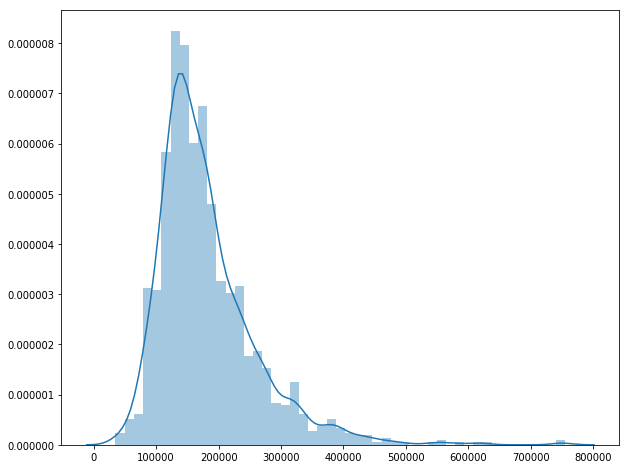

In [17]:

sns.distplot(y)

In [20]:
# Recall null hypothesis is that distribution is normally distributed.
_, p_value = stats.jarque_bera(y)
print("P-value {} less than 0.05 means we can reject null hypothesis".format(p_value))

P-value 0.0 less than 0.05 means we can reject null hypothesis


In [24]:
_, p_value = stats.normaltest(y)
print("P-value: {}".format(p_value))

P-value: [  2.28384835e-133]
